**DATA VISUALIZATION OF BASE MODELS RESULTS**

In [17]:
import pandas as pd
import numpy as np

f1score_stacking = pd.read_csv("weighted_f1_stacking.csv", sep='\,', engine='python')
f1score_blending = pd.read_csv("weighted_f1_blending.csv", sep='\,', engine='python')
f1score_ensembling = pd.read_csv("weighted_f1_ensembling.csv", sep='\,', engine='python')

In [18]:
print(f"Stacking Mean Weighted F1-Score:   {np.mean(f1score_stacking['score'])}")
print(f"Blending Mean Weighted F1-Score:   {np.mean(f1score_blending['score'])}")
print(f"Ensembling Mean Weighted F1-Score: {np.mean(f1score_ensembling['score'])}")

Stacking Mean Weighted F1-Score:   0.6674173245254069
Blending Mean Weighted F1-Score:   0.6620278169535677
Ensembling Mean Weighted F1-Score: 0.6364774420476367


In [19]:
sorted_ensemble_scores = [f1score_ensembling['score'],
                      f1score_blending['score'],
                      f1score_stacking['score']
                     ]

sorted_ensemble_names = ["Ensembling",
                     "Blending",
                     "Stacking"
                    ]

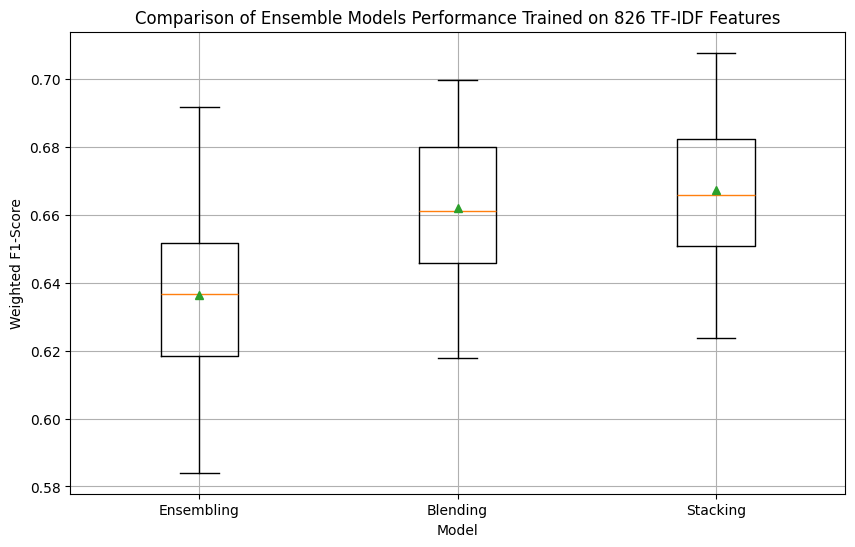

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 6))
plt.boxplot(sorted_ensemble_scores, tick_labels = sorted_ensemble_names, showmeans = True)
plt.title('Comparison of Ensemble Models Performance Trained on 826 TF-IDF Features')
plt.ylabel('Weighted F1-Score')
plt.xlabel('Model')
plt.grid(True)
plt.show()

#fig.savefig('comparisonEnsembleModels.png')

**PLOT BASE MODELS WITH TIME**

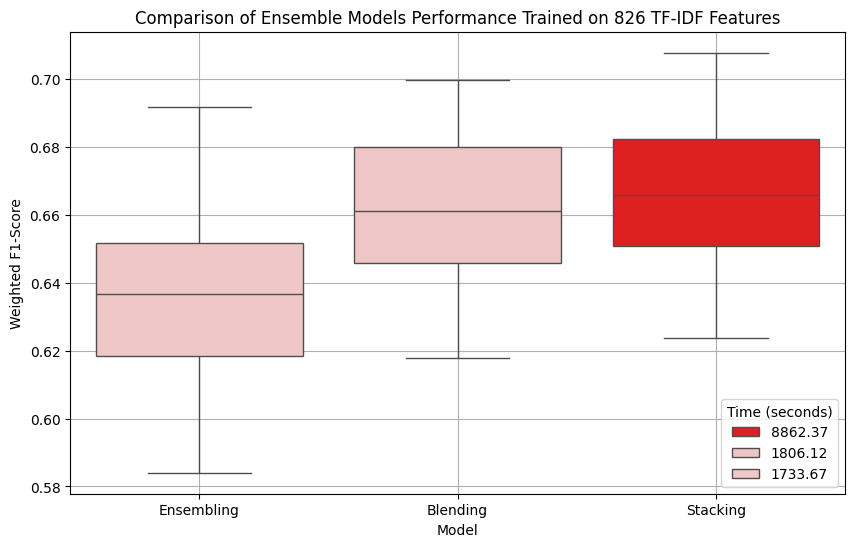

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    "Model": np.repeat(sorted_ensemble_names, 102),
    "Score": np.concatenate(sorted_ensemble_scores),
    "Time": np.concatenate([np.repeat(1733.67, 102),
                          np.repeat(1806.12, 102),
                          np.repeat(8862.37, 102)]
                         )
}

df = pd.DataFrame(data)

# Plotting with Seaborn
fig = plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="Model",
    y="Score",
    hue="Time",
    palette="light:#F00",
    hue_norm=(0, df["Time"].max()), # df["Time"].min(), df["Time"].max()
    dodge=False,
    #showmeans = True
)

# Add title and labels
plt.title("Comparison of Ensemble Models Performance Trained on 826 TF-IDF Features")
plt.ylabel("Weighted F1-Score")
plt.xlabel("Model")

# Add colorbar
# sm = plt.cm.ScalarMappable(cmap= sns.color_palette("light:#F00", as_cmap=True), norm=plt.Normalize(vmin=0, vmax=df["Time"].max()))
# sm.set_array([])
# cbar = plt.colorbar(sm, ax=plt.gca(), orientation="vertical")
# cbar.set_label("Time (seconds)")

#plt.legend([],[], frameon=False)

plt.legend(reverse = True, title = "Time (seconds)", loc = "lower right")

plt.grid(True)
plt.show()

#fig.savefig('comparisonEnsembleModelsTime.png')

**Distribution of F1-Score of The Best Base Model**

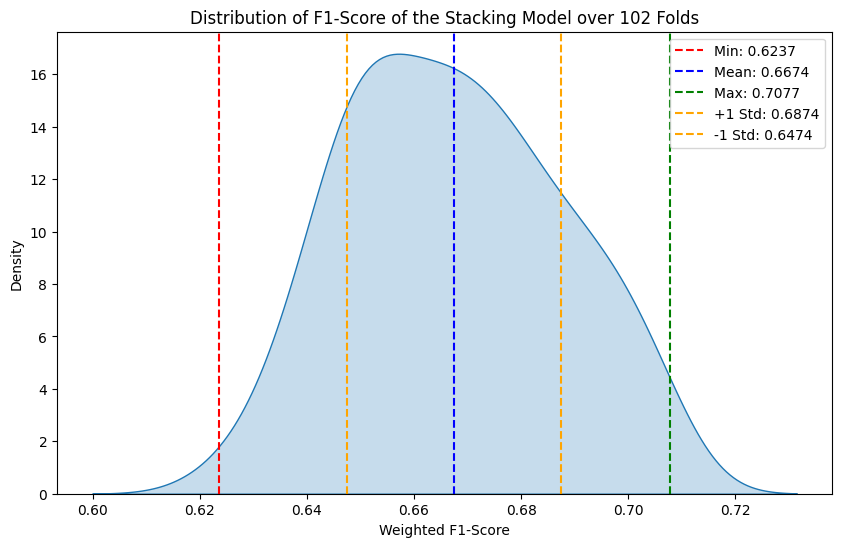

In [22]:
# Calculate min, mean, max, and standard deviation
min_val = f1score_stacking['score'].min()
mean_val = f1score_stacking['score'].mean()
max_val = f1score_stacking['score'].max()
std_val = f1score_stacking['score'].std()

# Create the density plot
fig = plt.figure(figsize=(10, 6))
sns.kdeplot(f1score_stacking['score'], fill=True)

# Add vertical lines for min, mean, max, and std
plt.axvline(x=min_val, color='r', linestyle='--', label=f'Min: {min_val:.4f}')
plt.axvline(x=mean_val, color='b', linestyle='--', label=f'Mean: {mean_val:.4f}')
plt.axvline(x=max_val, color='g', linestyle='--', label=f'Max: {max_val:.4f}')
plt.axvline(x=mean_val + std_val, color='orange', linestyle='--', label=f'+1 Std: {mean_val + std_val:.4f}')
plt.axvline(x=mean_val - std_val, color='orange', linestyle='--', label=f'-1 Std: {mean_val - std_val:.4f}')


plt.title('Distribution of F1-Score of the Stacking Model over 102 Folds')
plt.xlabel('Weighted F1-Score')
plt.ylabel('Density')
plt.legend()
plt.show()

#fig.savefig('bestEnsembleModel.png')

**COMPARISON OF BEST BASE MODEL WITH BEST ENSEMBLE MODEL**

In [23]:
f1score_gb = pd.read_csv("weighted_f1_gb.csv", sep='\,', engine='python')

In [24]:
print(f"Stacking Mean Weighted F1-Score:            {np.mean(f1score_stacking['score'])}")
print(f"Gradient Boosting Mean Weighted F1-Score:   {np.mean(f1score_gb['score'])}")

Stacking Mean Weighted F1-Score:            0.6674173245254069
Gradient Boosting Mean Weighted F1-Score:   0.6389097766681082


In [25]:
best_scores = [f1score_gb['score'],
               f1score_stacking['score']
              ]

best_models = ["Gradient Boosting",
               "Stacking"
              ]

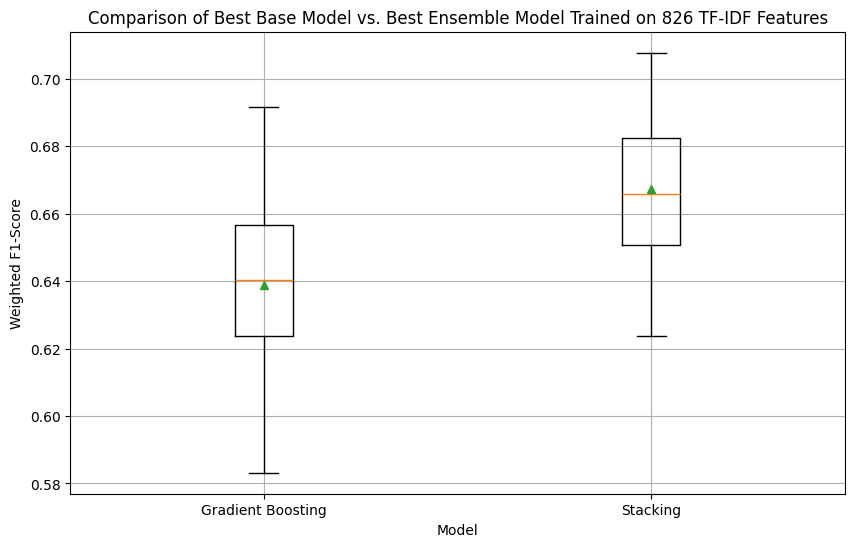

In [26]:
fig = plt.figure(figsize = (10, 6))
plt.boxplot(best_scores, tick_labels = best_models, showmeans = True)
plt.title('Comparison of Best Base Model vs. Best Ensemble Model Trained on 826 TF-IDF Features')
plt.ylabel('Weighted F1-Score')
plt.xlabel('Model')
plt.grid(True)
plt.show()

#fig.savefig('comparisonBestBaseBestEnsemble.png')

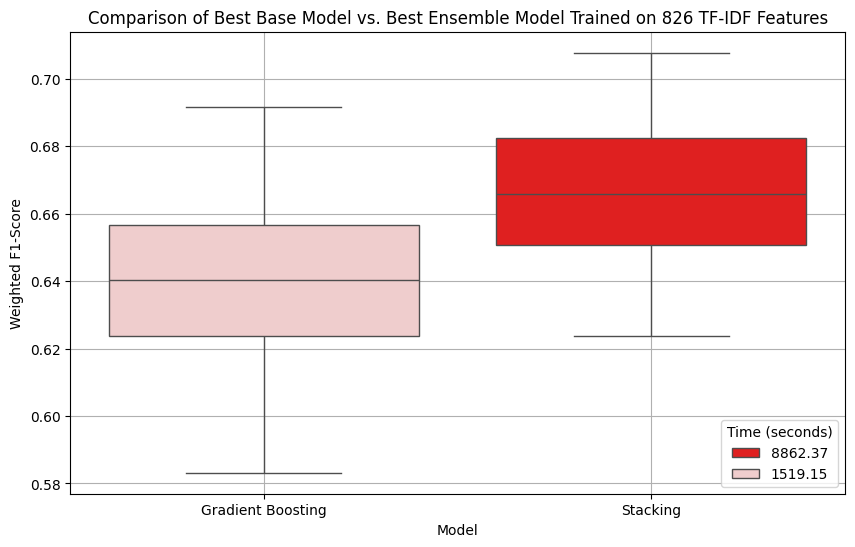

In [27]:
data_2 = {
    "Model": np.repeat(best_models, 102),
    "Score": np.concatenate(best_scores),
    "Time": np.concatenate([np.repeat(1519.15, 102),
                            np.repeat(8862.37, 102)
                           ]
                         )
}

df_2 = pd.DataFrame(data_2)

# Plotting with Seaborn
fig = plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df_2,
    x="Model",
    y="Score",
    hue="Time",
    palette="light:#F00",
    hue_norm=(0, df_2["Time"].max()), # df_2["Time"].min(), df_2["Time"].max()
    dodge=False,
    #showmeans = True
)

# Add title and labels
plt.title("Comparison of Best Base Model vs. Best Ensemble Model Trained on 826 TF-IDF Features")
plt.ylabel("Weighted F1-Score")
plt.xlabel("Model")

# Add colorbar
# sm = plt.cm.ScalarMappable(cmap= sns.color_palette("light:#F00", as_cmap=True), norm=plt.Normalize(vmin=0, vmax=df["Time"].max()))
# sm.set_array([])
# cbar = plt.colorbar(sm, ax=plt.gca(), orientation="vertical")
# cbar.set_label("Time (seconds)")

#plt.legend([],[], frameon=False)

plt.legend(reverse = True, title = "Time (seconds)", loc = "lower right")

plt.grid(True)
plt.show()

#fig.savefig('comparisonBestBaseBestEnsembleTime.png')